# AllLife Credit Card Customer Segmentation 

Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help. 

Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank. 

Key Questions: 
1. How many different segments of customers are there? 
2. How are these segments different from each other? 
3. What are your recommendations to the bank on how to better market to and service these customers? 

Data Description: • Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre. 

In [4]:
#Basic Python Library
import pandas as pd
import numpy as np

#Library for Nice graphing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sn
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

#Library for Statistics Operation
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

#Machine learning Library
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold= 1000)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Load data and perform initial screening

In [5]:
ccdata = pd.read_csv("CCC_Data.csv")

In [6]:
ccdata.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [8]:
# Find the total number of missing values in the dataframe
print ("\nMissing values :  ", ccdata.isnull().sum().values.sum())

# printing total numbers of Unique value in the dataframe 
print ("\nUnique values :  \n",ccdata.nunique())


Missing values :   0

Unique values :  
 Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64


# Uni/Bi/Multivariate, EDA and Visualization 

In [9]:
df01 = pd.read_csv('CCC_Data.csv')

In [10]:
df01.shape

(660, 7)

In [11]:
df01.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [12]:
# Dropping columns not necessary for analysis.

df02 = df01.drop(['Sl_No' , 'Customer Key'] , axis='columns') # , inPlace = True)
df02.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


In [13]:
# Finding the unique data

df02.apply(lambda x: len(x.unique()))

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [14]:
# Number of people with Zero Credit Limit
df02[df02['Avg_Credit_Limit'] < 1]['Avg_Credit_Limit'].count()

0

In [15]:
# Number of people with Zero Credit Card
df02[df02['Total_Credit_Cards'] < 1]['Total_Credit_Cards'].count()

0

In [16]:
# Number of people with Zero Bank Visit
df02[df02['Total_visits_bank'] < 1]['Total_visits_bank'].count()

100

In [17]:
# Number of people with Zero Online Visit
df02[df02['Total_visits_online'] < 1]['Total_visits_online'].count()

144

In [18]:
# Number of people with Zero Calls Made
df02[df02['Total_calls_made'] < 1]['Total_calls_made'].count()

97

In [19]:
# Check for missing values, if any.

df02.isnull().any()

Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

In [20]:
missing_values = df02.isnull().mean()*100
print("Credit Card Customer Segmentation:CCCS Dataset consists of {missing_values} missing values.".format(missing_values = missing_values.sum()))

Credit Card Customer Segmentation:CCCS Dataset consists of 0.0 missing values.


(array([390.,  84.,  77.,  58.,  12.,   6.,   6.,   9.,  11.,   7.]),
 array([  3000.,  22700.,  42400.,  62100.,  81800., 101500., 121200.,
        140900., 160600., 180300., 200000.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Avg_Credit_Limit')

(array([ 59.,  64.,  53., 151.,  74., 117., 101.,  11.,  11.,  19.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Total_Credit_Cards')

(array([100.,   0., 112.,   0., 158.,   0., 100.,   0.,  92.,  98.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Total_visits_bank')

(array([253., 189., 113.,  54.,   8.,   6.,  10.,   5.,  11.,  11.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Total_visits_online')

(array([ 97.,  90.,  91.,  83., 108.,  29.,  39.,  35.,  30.,  58.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

Text(0.5, 1.0, 'Total_calls_made')

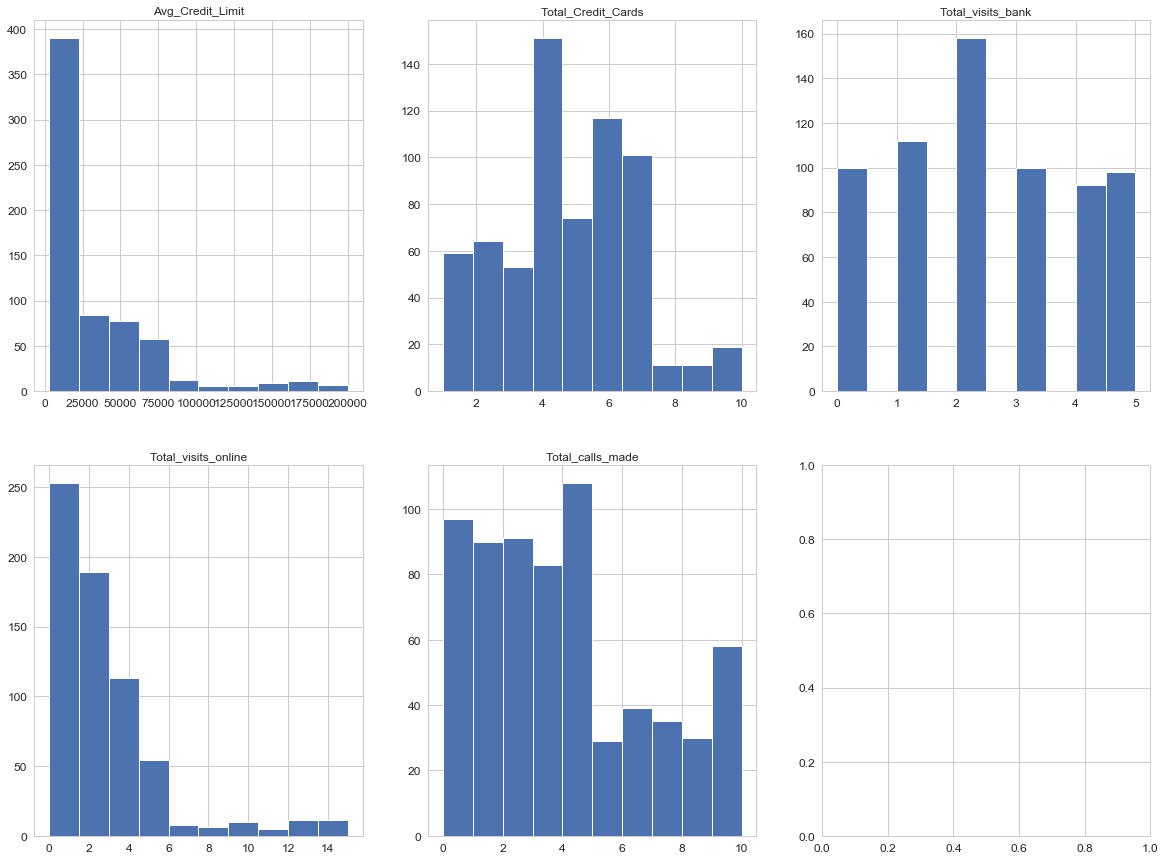

In [21]:
#Individual columns exploration

num_columns = ['Avg_Credit_Limit', 'Total_Credit_Cards','Total_visits_bank', 'Total_visits_online', 'Total_calls_made']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df02[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [22]:
#%age of 'Avg_Credit_Limit' values above 20000

len (df02[df02['Avg_Credit_Limit'] > 20000] ) / len(df02) * 100

40.909090909090914

In [23]:
#%age of 'Total_Credit_Cards' values above 5

len (df02[df02['Total_Credit_Cards'] > 5] ) / len(df02) * 100

39.24242424242424

In [24]:
#%age of 'Total_visits_bank' values above 2

len (df02[df02['Total_visits_bank'] > 2] ) / len(df02) * 100

43.93939393939394

In [25]:
#%age of 'Total_visits_online' values above 2

len (df02[df02['Total_visits_online'] > 2] ) / len(df02) * 100

33.03030303030303

In [26]:
#%age of 'Total_calls_made' values above 2

len (df02[df02['Total_calls_made'] > 2] ) / len(df02) * 100

57.878787878787875

In [27]:
mean_values = df02.mean()
print("CCCS dataset consists of these mean values:  {mean_values}".format(mean_values = mean_values))

CCCS dataset consists of these mean values:  Avg_Credit_Limit       34574.242424
Total_Credit_Cards         4.706061
Total_visits_bank          2.403030
Total_visits_online        2.606061
Total_calls_made           3.583333
dtype: float64


In [28]:
mode_value = df02['Avg_Credit_Limit'].mode()
print("CCCS dataset consists of this mode value for the target column - Average Credit Limit:  {mode_value}".format(mode_value = mode_value))

CCCS dataset consists of this mode value for the target column - Average Credit Limit:  0    8000
dtype: int64


In [29]:
median_values = df02.median()
print("CCCS dataset consists of these median values:  {median_values}".format(median_values = median_values))

CCCS dataset consists of these median values:  Avg_Credit_Limit       18000.0
Total_Credit_Cards         5.0
Total_visits_bank          2.0
Total_visits_online        2.0
Total_calls_made           3.0
dtype: float64


In [30]:
print("Data_quantile(25%):", df02.quantile(q=0.25)) 

Data_quantile(25%): Avg_Credit_Limit       10000.0
Total_Credit_Cards         3.0
Total_visits_bank          1.0
Total_visits_online        1.0
Total_calls_made           1.0
Name: 0.25, dtype: float64


In [31]:
print("Data_quantile(50%):", df02.quantile(q=0.50)) 

Data_quantile(50%): Avg_Credit_Limit       18000.0
Total_Credit_Cards         5.0
Total_visits_bank          2.0
Total_visits_online        2.0
Total_calls_made           3.0
Name: 0.5, dtype: float64


In [32]:
print("Data_quantile(75%):", df02.quantile(q=0.75)) 

Data_quantile(75%): Avg_Credit_Limit       48000.0
Total_Credit_Cards         6.0
Total_visits_bank          4.0
Total_visits_online        4.0
Total_calls_made           5.0
Name: 0.75, dtype: float64


Mean:  34574.242424242424 
Median:  18000.0 
Mode:  8000


<Figure size 1440x720 with 0 Axes>

(array([ 1., 52., 59., 54., 42., 51., 39., 46., 46.,  0.,  0.,  6.,  5.,
        11.,  7., 10., 13., 14., 10.,  8.,  4.,  6., 12., 12., 10.,  4.,
         8.,  6.,  9.,  6.,  6.,  9., 10.,  4., 14.,  7.,  8.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  1.,  0.,  2.,  2.,  2.,  3.,  0.,  0.,
         1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  1.,
         1.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  1.,  3.,
         2.,  0.,  0.,  2.,  2.,  1.,  0.,  3.,  1.,  1.,  1.,  0.,  0.,
         2.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  1.]),
 array([  3000.,   4970.,   6940.,   8910.,  10880.,  12850.,  14820.,
         16790.,  18760.,  20730.,  22700.,  24670.,  26640.,  28610.,
         30580.,  32550.,  34520.,  36490.,  38460.,  40430.,  42400.,
         44370.,  46340.,  48310.,  50280.,  52250.,  54220.,  56190.,
         58160.,  60130.,  62100.,  64070.,  66040.,  68010.,  69980.,
         71950.,  73920.,  75890.,  77860.,  79830.,  81800.,  83770.,
        

Text(0.5, 0, 'Avg_Credit_Limit')

Text(0, 0.5, 'Frequency')

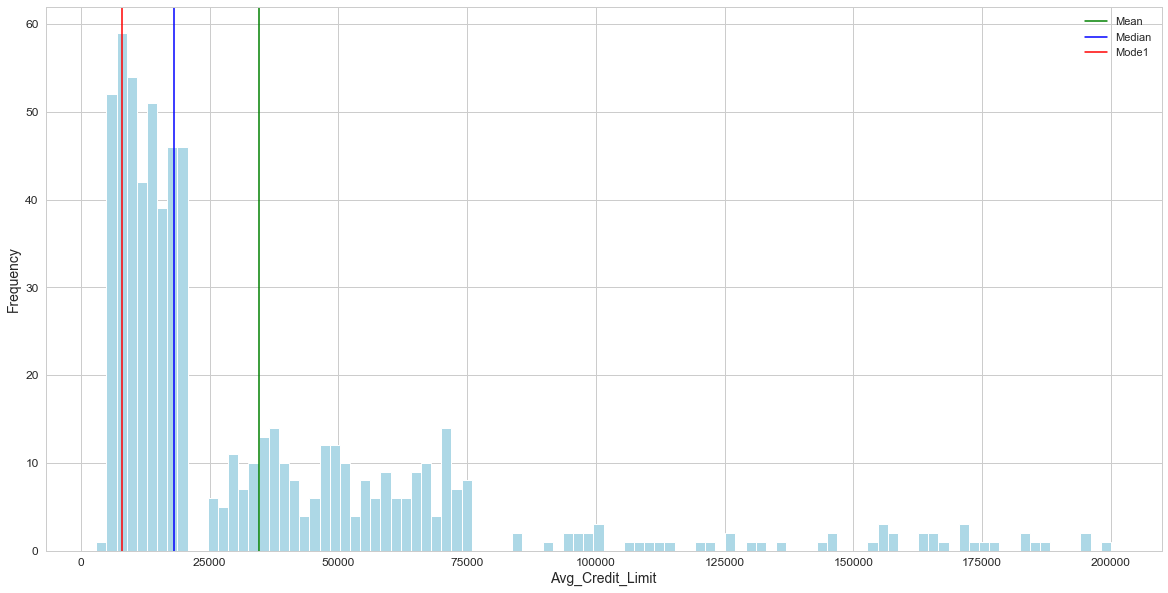

In [33]:
mean=df02['Avg_Credit_Limit'].mean()
median=df02['Avg_Credit_Limit'].median()
mode=df02['Avg_Credit_Limit'].mode()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0])

plt.figure(figsize=(20,10)) # set the figure size
plt.hist(df02['Avg_Credit_Limit'],bins=100,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode1')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Avg_Credit_Limit')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()
warnings.filterwarnings('ignore')

<Figure size 720x576 with 0 Axes>

Text(0.5, 1, 'Correlation')

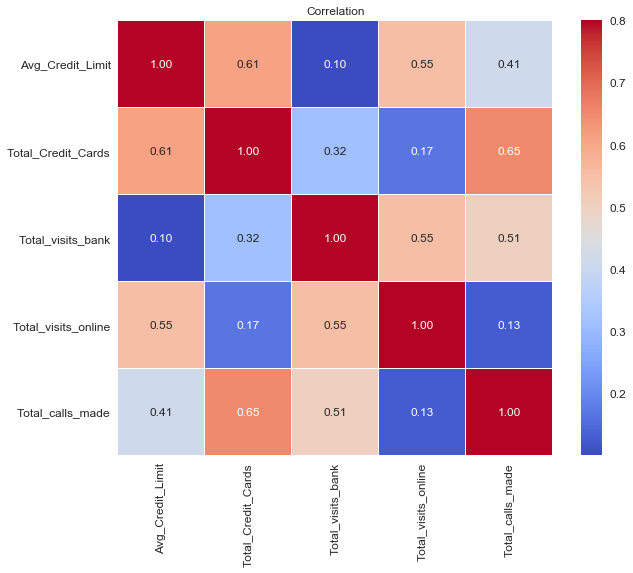

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(df02.corr().abs(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01, cmap='coolwarm')
plt.title('Correlation')
plt.show()

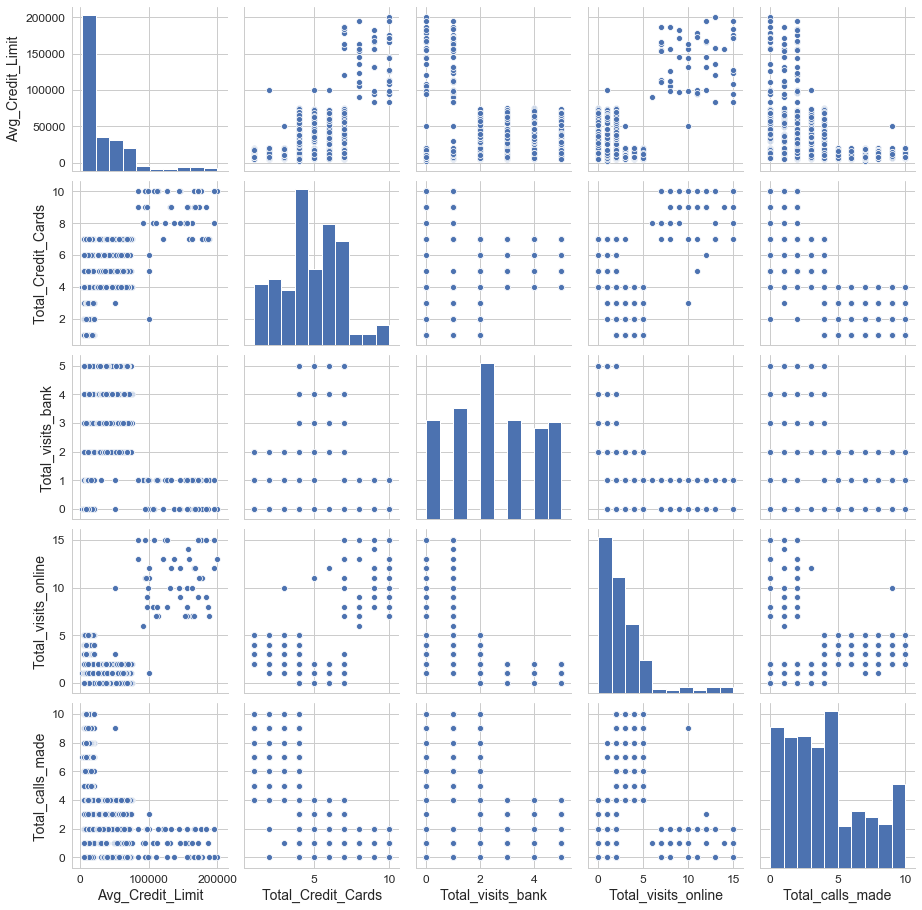

In [35]:
# Bi / Multivariate analysis
# Check the relation between each columns
sns.pairplot(df02.iloc[:,0:])

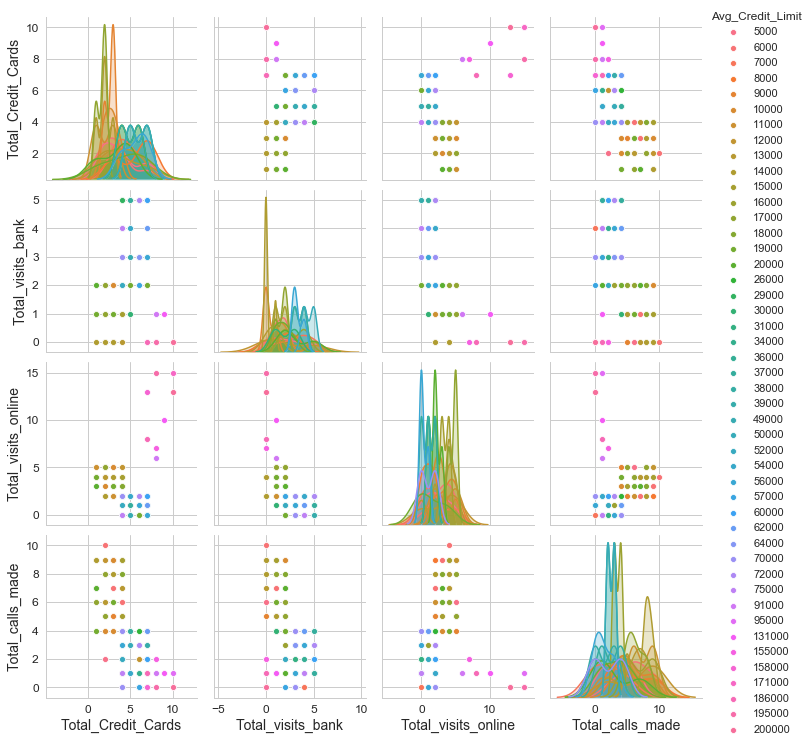

In [36]:
#Plot KDE for Average Credit Limit
sns.pairplot(df02.iloc[:,0:].sample(100),diag_kind='kde', hue="Avg_Credit_Limit")

In [37]:
#Check the correlation of Average Credit Limit with other variables
cor = df02[['Avg_Credit_Limit', 
              'Total_Credit_Cards', 
              'Total_visits_bank', 
              'Total_visits_online', 
              'Total_calls_made']].corr()

cor

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.414352,-0.651251,-0.506016,0.127299,1.000000


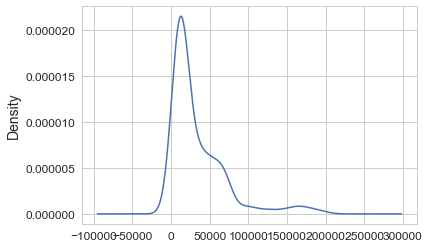

In [38]:
#Plot KDE for Average Credit Limit
ax1 = df02.Avg_Credit_Limit.plot.kde()

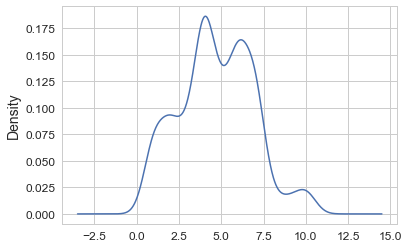

In [39]:
#Plot KDE for Total No. of Credit Cards
ax2 = df02.Total_Credit_Cards.plot.kde()

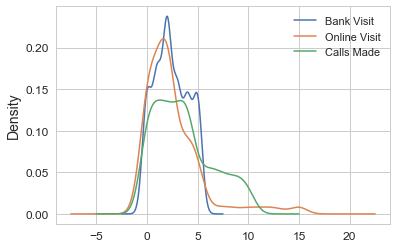

In [40]:
#Plot KDE for Bank Contact Methods 
df03 = pd.DataFrame({
    'Bank Visit': df02.Total_visits_bank,
    'Online Visit': df02.Total_visits_online,
    'Calls Made': df02.Total_calls_made,
})
ax = df03.plot.kde()

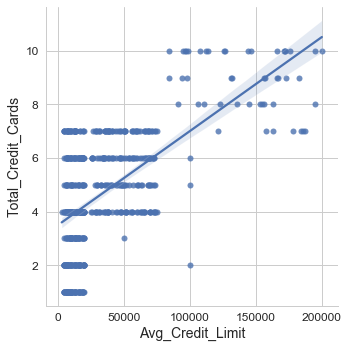

In [41]:
sns.lmplot(x="Avg_Credit_Limit", y="Total_Credit_Cards", data=df02)

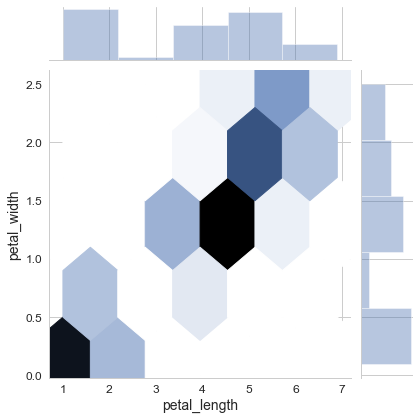

In [42]:
#Plot Hexagonal Binning, since the data is very scattered and difficult to analyze through scatterplots.

df03 = sns.load_dataset('iris')
sns.jointplot(x = 'petal_length',y = 'petal_width',data = df03,kind = 'hex')
plt.show()

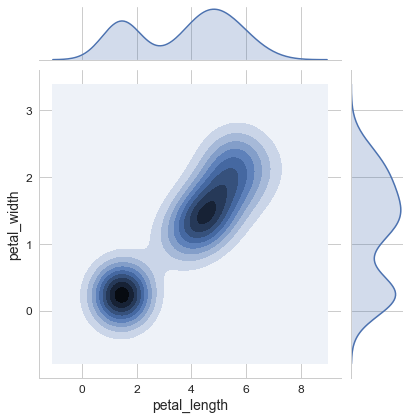

In [43]:
#Plot KDE for further analysis and identify clusters visually.

df04 = sns.load_dataset('iris')
sns.jointplot(x = 'petal_length',y = 'petal_width',data = df04,kind = 'kde')
plt.show()

# Insights: 01

#From the above we can infer the following:
#a) 15-25% customers had zero contact with bank via visit, online or calls, these ones can be reached out to improvise the support services. 
#b) HNI customers (major cluster) can be identified by the top 40% (approx.) having either average credit limit more than 20k or owning more than 5 credit cards, these one can be targeted via personalized campaigns to upsell their products.
#c) Loyal customers (major cluster) may be identified by the 33-58% (approx.) who have made a contact with bank either via visit, online or calls, these one can be contacted to collect feedback on support services. 
#d) Average Credit Limit has positive correlation with Total Credit Cards & Total Visits Online.
#e) However, large chunk of customers owning Total Credit Cards<7 have Average Credit Limit<80000.   
#f) Total Credit Cards has positive correlation with Total Call Made.
#g) Total Visits Online has positive correlation with Total Visits Bank.
#h) However, f & g do not provide any valuable insight.
#i) In general bank contact (via visits and calls) have a negative correlation with Average Credit Limit, indicating poor support services. 
#j) Two clear clusters emerge in the lower segment and mid-segment for marketing campaigns.
#NOTE:
#The objective is to identify customer segments to upsell and improve support services. Hence -  
#Treating outliers is not necessary since there is no target column.
#Skewness reduction is not necessary as the variables may form seperate clusters.

# Applying Hierarchical Clustering

In [44]:
custDataAttr=df01.iloc[:,2:]
custDataAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


#Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods

In [45]:
CustDataScaled=custDataAttr.apply(zscore)
CustDataScaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


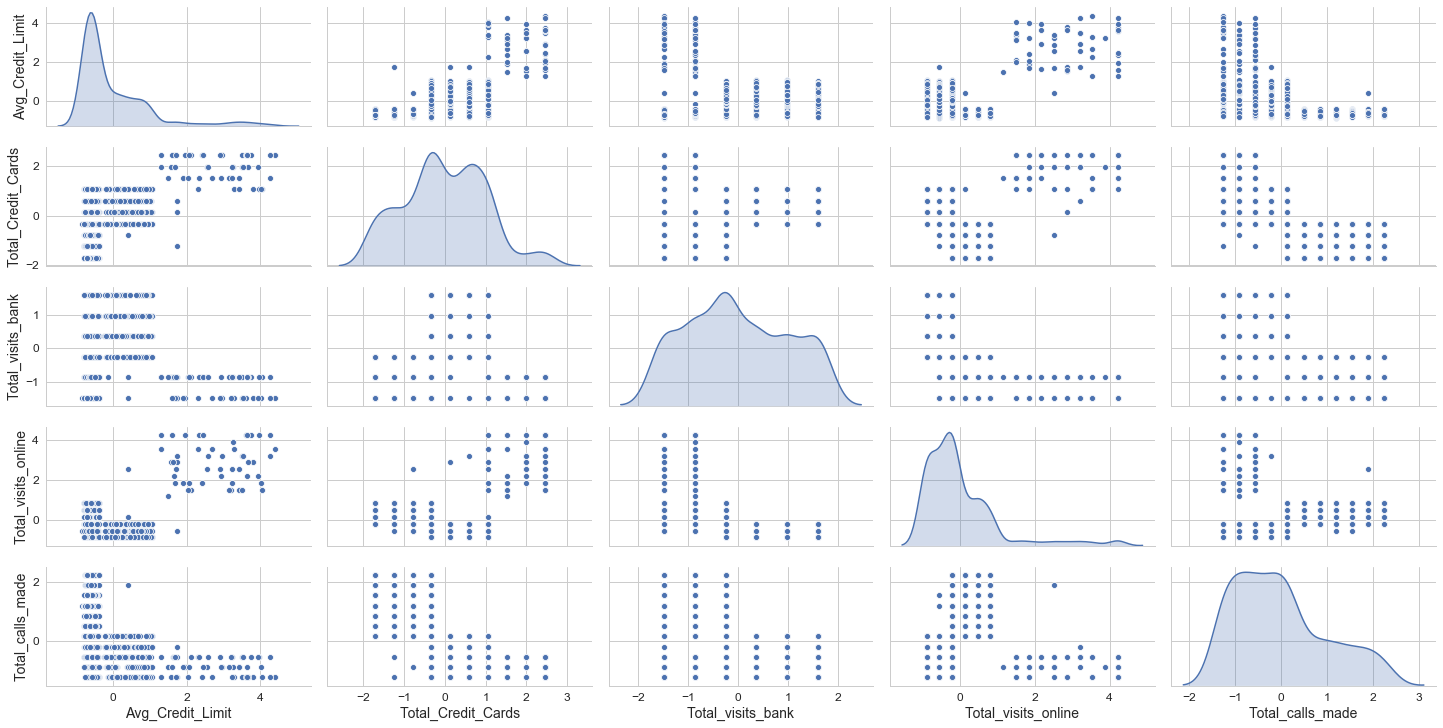

In [46]:
sns.pairplot(CustDataScaled, height=2,aspect=2 , diag_kind='kde')

#Use ward as linkage metric and distance as Eucledian

In [47]:
Z = linkage(CustDataScaled, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [48]:
Z[:]

array([[ 464.   ,  497.   ,    0.   ,    2.   ],
       [ 425.   ,  455.   ,    0.   ,    2.   ],
       [ 250.   ,  361.   ,    0.   ,    2.   ],
       ...,
       [1313.   , 1314.   ,   16.845,  385.   ],
       [1311.   , 1316.   ,   47.067,  435.   ],
       [1315.   , 1317.   ,   50.163,  660.   ]])

#Plot the Dendogram for consolidated dataframe

<Figure size 1800x720 with 0 Axes>

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [60.0, 60.0, 90.0, 90.0],
  [20.0, 20.0, 75.0, 75.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [135.0, 135.0, 145.0, 145.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [140.0, 140.0, 163.75, 163.75],
  [112.5, 112.5, 151.875, 151.875],
  [47.5, 47.5, 132.1875, 132.1875],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [225.0, 225.0, 235.0, 235.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [245.0, 245.0, 262.5, 262.5],
  [230.0, 230.0, 253.75, 253.75],
  [202.5, 202.5, 241.875, 241.875],
  [285.0, 285.0, 295.0, 295.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [290.0, 290.0, 312.5, 312.5],
  [355.0, 355.0, 365.0, 365.0],
  [345.0, 345.0, 360

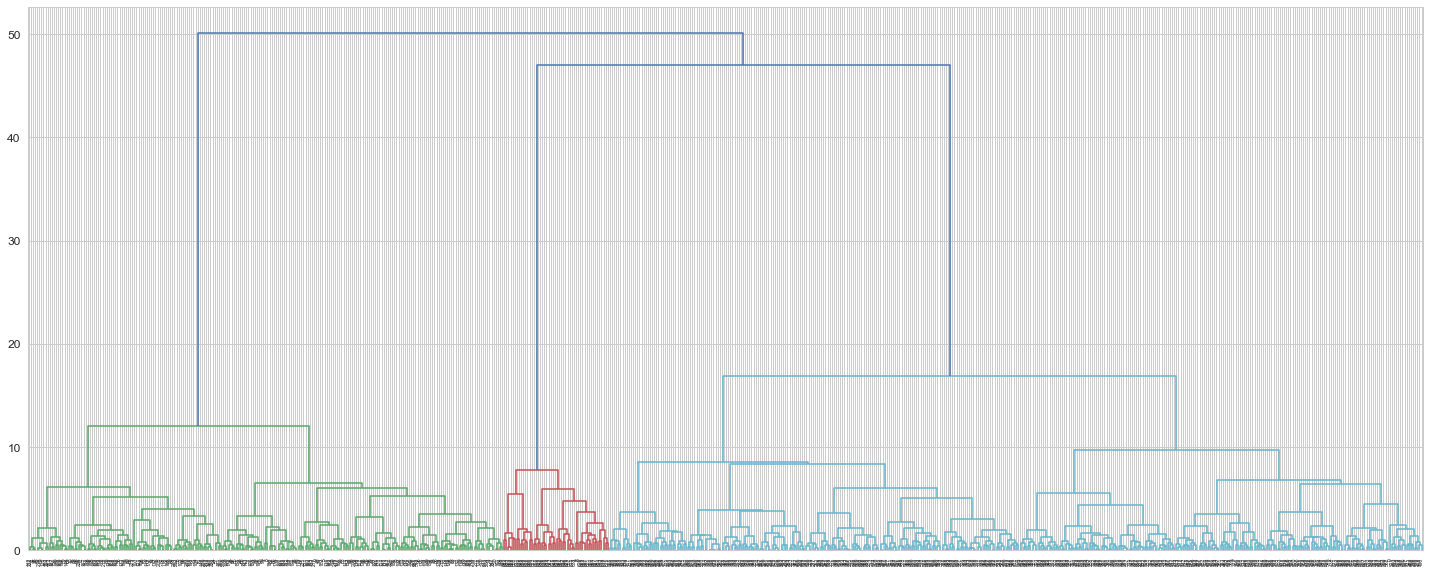

In [49]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

#Recreate Dendogram by merging clusters.
#From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 47.06715339012147, 47.06715339012147, 0.0],
  [0.0, 50.16298665830234, 50.16298665830234, 47.06715339012147]],
 'ivl': ['(225)', '(50)', '(385)'],
 'leaves': [1315, 1311, 1316],
 'color_list': ['b', 'b']}

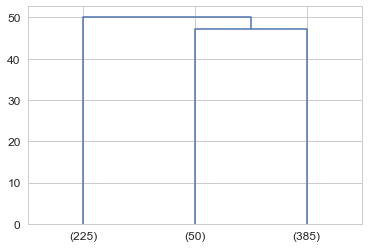

In [50]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [207]:
max_d = 50

#Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [208]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

#Using Agglomerative Clustering to see the difference from normal hierarchical clustering

<Figure size 1296x1152 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [100.0, 100.0, 140.0, 140.0],
  [40.0, 40.0, 120.0, 120.0],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [210.0, 210.0, 230.0, 230.0],
  [180.0, 180.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [250.0, 250.0, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [260.0, 260.0, 300.0, 300.0],
  [200.0, 200.0, 280.0, 280.0],
  [80.0, 80.0, 240.0, 240.0],
  [325.0, 325.0, 335.0, 335.0],
  [345

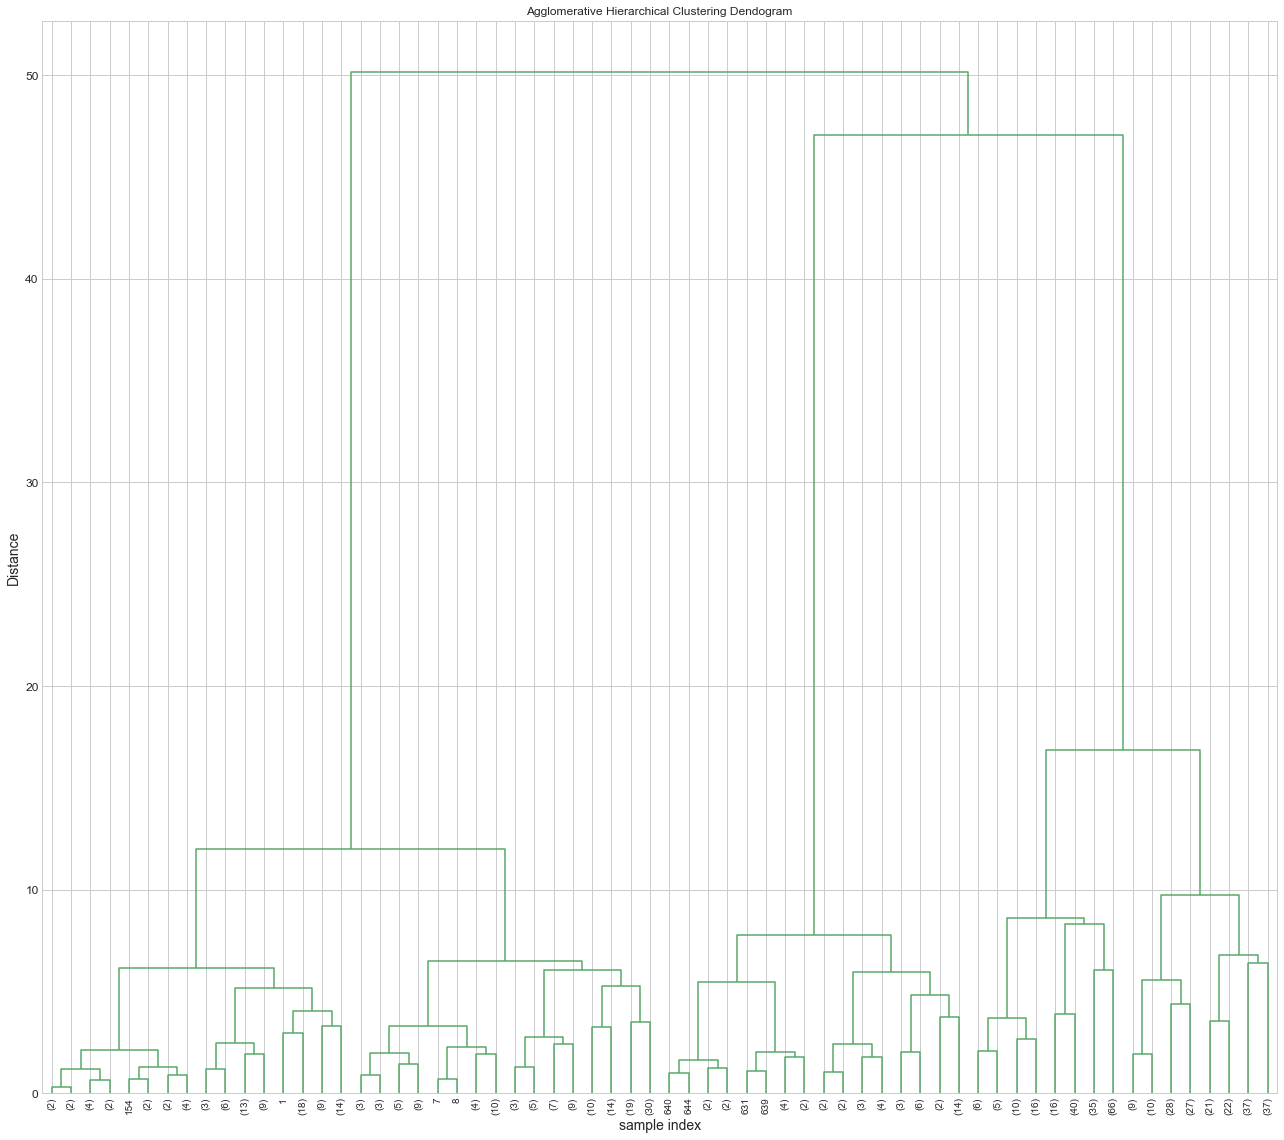

In [209]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(CustDataScaled, 'ward')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

#Use complete as linkage metric and distance as Euclidean

In [211]:
Z = linkage(CustDataScaled, 'complete', metric='euclidean')
Z.shape

(659, 4)

In [212]:
Z[:]

array([[ 464.   ,  497.   ,    0.   ,    2.   ],
       [ 250.   ,  361.   ,    0.   ,    2.   ],
       [ 320.   ,  378.   ,    0.   ,    2.   ],
       ...,
       [1309.   , 1314.   ,    4.335,  397.   ],
       [1313.   , 1316.   ,    5.958,  610.   ],
       [1315.   , 1317.   ,    8.449,  660.   ]])

#Plot the Dendogram for consolidated dataframe

<Figure size 1800x720 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [55.0, 55.0, 72.5, 72.5],
  [40.0, 40.0, 63.75, 63.75],
  [12.5, 12.5, 51.875, 51.875],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [155.0, 155.0, 165.0, 165.0],
  [130.0, 130.0, 160.0, 160.0],
  [100.0, 100.0, 145.0, 145.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [212.5, 212.5, 242.5, 242.5],
  [182.5, 182.5, 227.5, 227.5],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [205.0, 205.0, 281.25, 281.25],
  [122.5, 122.5, 243.125, 243.125],
  [32.1875, 32.1875, 182.8125, 182.8125],
  [315.0, 315.0, 325.0, 325.0],
  [355.0, 35

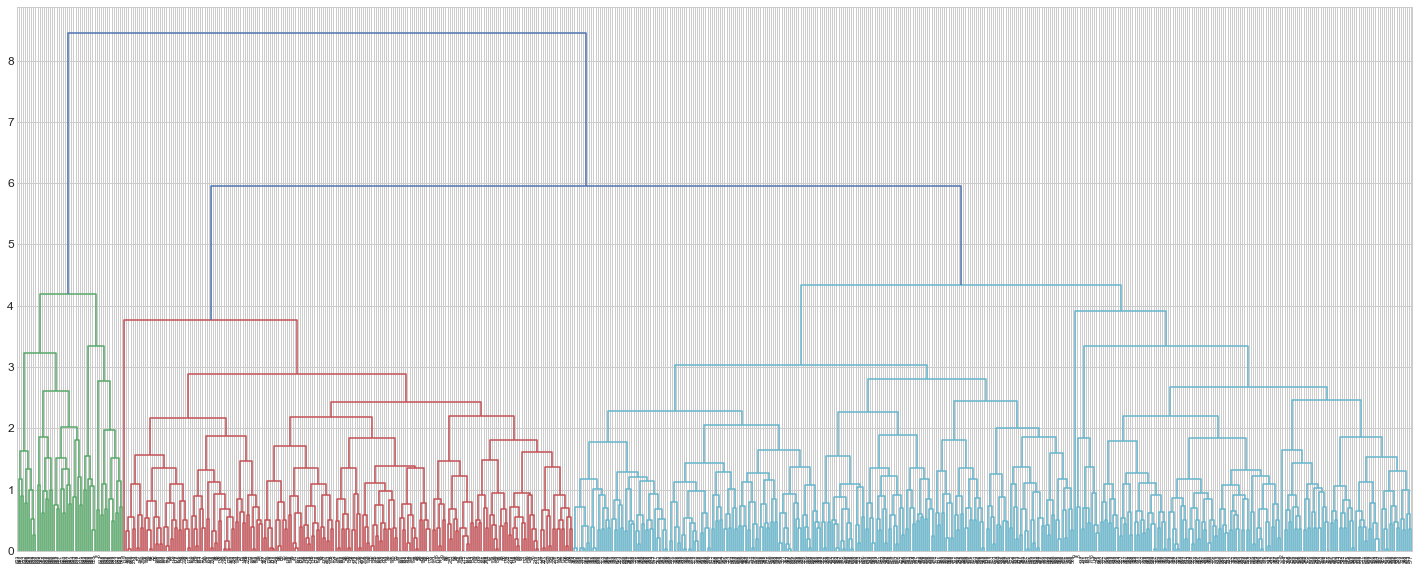

In [213]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

#Recreate Dendogram by merging clusters.
#From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 5.95846763901052, 5.95846763901052, 0.0],
  [0.0, 8.448536281088936, 8.448536281088936, 5.95846763901052]],
 'ivl': ['(50)', '(213)', '(397)'],
 'leaves': [1315, 1313, 1316],
 'color_list': ['b', 'b']}

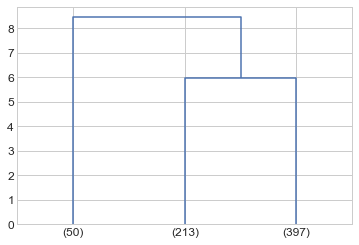

In [214]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [215]:
max_d = 50

#Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [216]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#Using Agglomerative Clustering to see the difference from normal hierarchical clustering

<Figure size 1296x1152 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [12.5, 12.5, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [90.0, 90.0, 130.0, 130.0],
  [31.25, 31.25, 110.0, 110.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [210.0, 210.0, 240.0, 240.0],
  [171.25, 171.25, 225.0, 225.0],
  [70.625, 70.625, 198.125, 198.125],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [290.0, 290.0, 330.0, 33

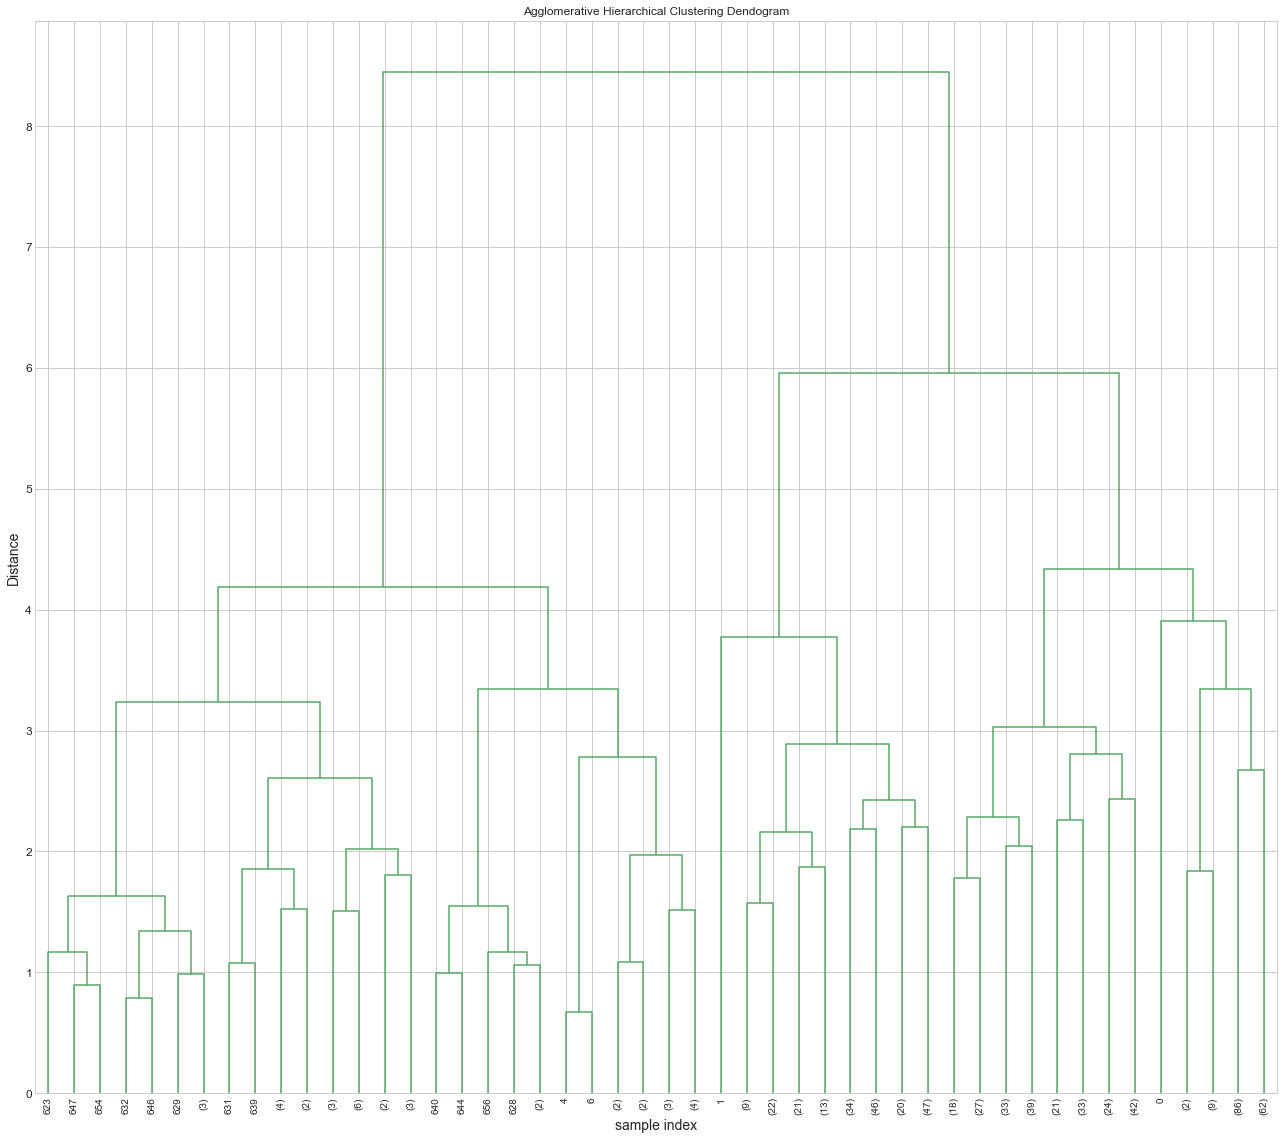

In [217]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(CustDataScaled, 'complete')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

#Use average as linkage metric and distance as Euclidean

In [218]:
Z = linkage(CustDataScaled, 'average', metric='euclidean')
Z.shape

(659, 4)

In [219]:
Z[:]

array([[ 464.   ,  497.   ,    0.   ,    2.   ],
       [ 250.   ,  361.   ,    0.   ,    2.   ],
       [ 252.   ,  324.   ,    0.   ,    2.   ],
       ...,
       [   0.   , 1309.   ,    3.111,  387.   ],
       [1315.   , 1316.   ,    3.253,  610.   ],
       [1314.   , 1317.   ,    5.454,  660.   ]])

#Plot the Dendogram for consolidated dataframe

<Figure size 1800x720 with 0 Axes>

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [55.0, 55.0, 65.0, 65.0],
  [40.0, 40.0, 60.0, 60.0],
  [25.0, 25.0, 50.0, 50.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [82.5, 82.5, 120.0, 120.0],
  [37.5, 37.5, 101.25, 101.25],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [175.0, 175.0, 185.0, 185.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [195.0, 195.0, 212.5, 212.5],
  [180.0, 180.0, 203.75, 203.75],
  [152.5, 152.5, 191.875, 191.875],
  [235.0, 235.0, 245.0, 245.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [295.0, 295.0, 305.0, 305.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [300.0, 300.0, 322.5, 322.5],
  [263.75, 263.75, 311.25, 311.25],
  [240.0, 240.0, 287.5, 287.5],
  [172.1875, 172.1875, 263.75, 263.75],
  [69.375, 6

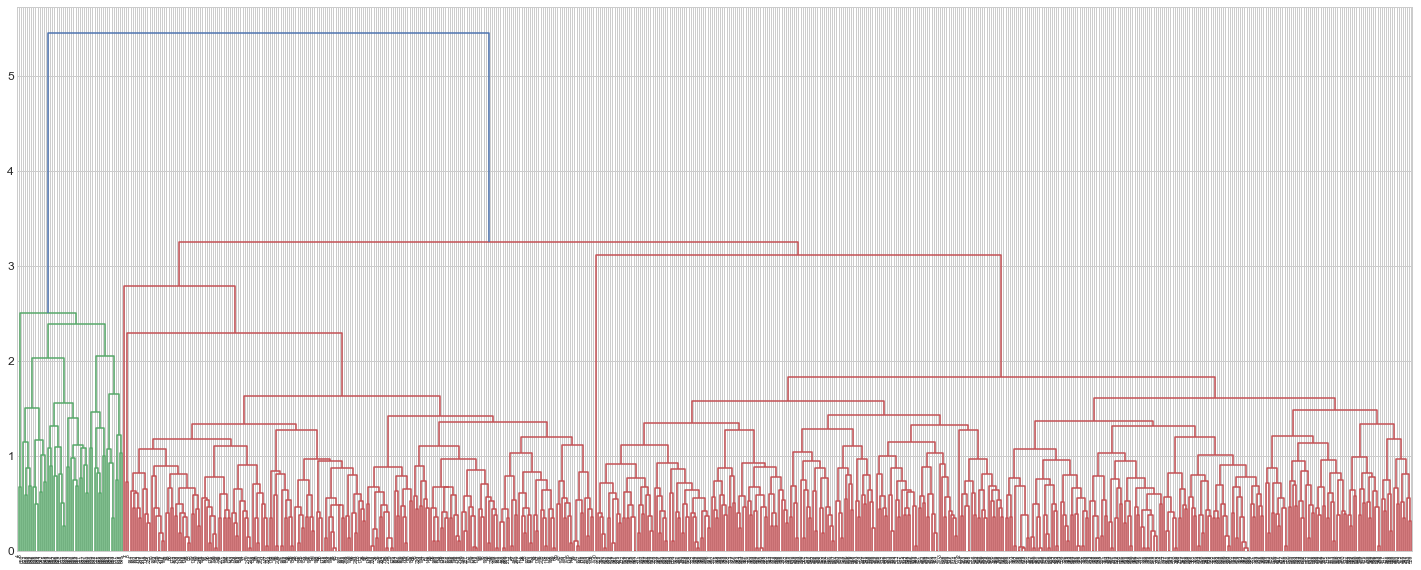

In [220]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

#Recreate Dendogram by merging clusters.
#From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 3.2525392345662776, 3.2525392345662776, 0.0],
  [0.0, 5.454180345752366, 5.454180345752366, 3.2525392345662776]],
 'ivl': ['(50)', '(223)', '(387)'],
 'leaves': [1314, 1315, 1316],
 'color_list': ['g', 'b']}

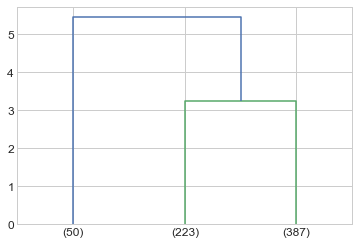

In [221]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [222]:
max_d = 6

#Use this distance measure(max_d) and fcluster function to cluster the data into 3 different groups

In [223]:
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

#Using Agglomerative Clustering to see the difference from normal hierarchical clustering

<Figure size 1296x1152 with 0 Axes>

Text(0.5, 1.0, 'Agglomerative Hierarchical Clustering Dendogram')

Text(0.5, 0, 'sample index')

Text(0, 0.5, 'Distance')

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [40.0, 40.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [120.0, 120.0, 160.0, 160.0],
  [60.0, 60.0, 140.0, 140.0],
  [10.0, 10.0, 100.0, 100.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [200.0, 200.0, 230.0, 230.0],
  [185.0, 185.0, 215.0, 215.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [280.0, 280.0, 320.0, 320.0],
  [255.0, 255.0, 300.0, 300.0],
  [200.0, 200.0, 277.5, 277.5],
  [5

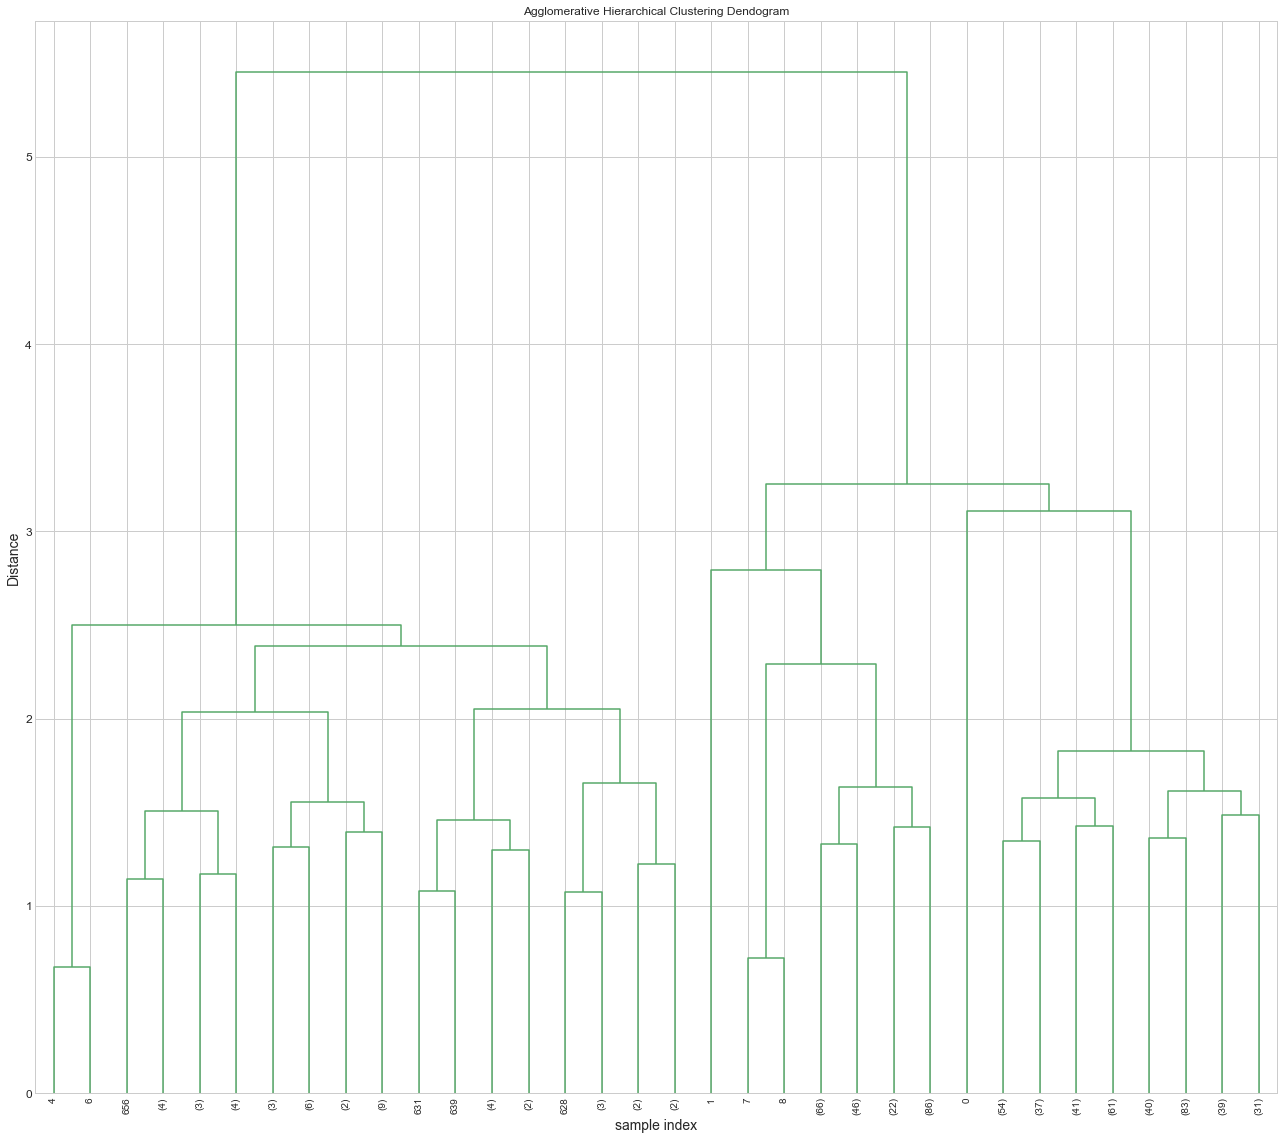

In [224]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(CustDataScaled, 'average')
dendrogram(Z,leaf_rotation=90.0,p=5,color_threshold=52,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

#Finding the Cophenetic Correlation between different dendograms based on ward, complete and average linkages 

In [225]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(CustDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(CustDataScaled))

c

0.7415156284827493

In [226]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(CustDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(CustDataScaled))

c

0.8599730607972423

In [227]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(CustDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(CustDataScaled))

c

0.8977080867389372

# Insights:02

#a) Dendogram with 'average' linkage has a higher cophenetic index, hence gives better clusters  

# Applying K-Means Clustering

In [228]:
df02.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


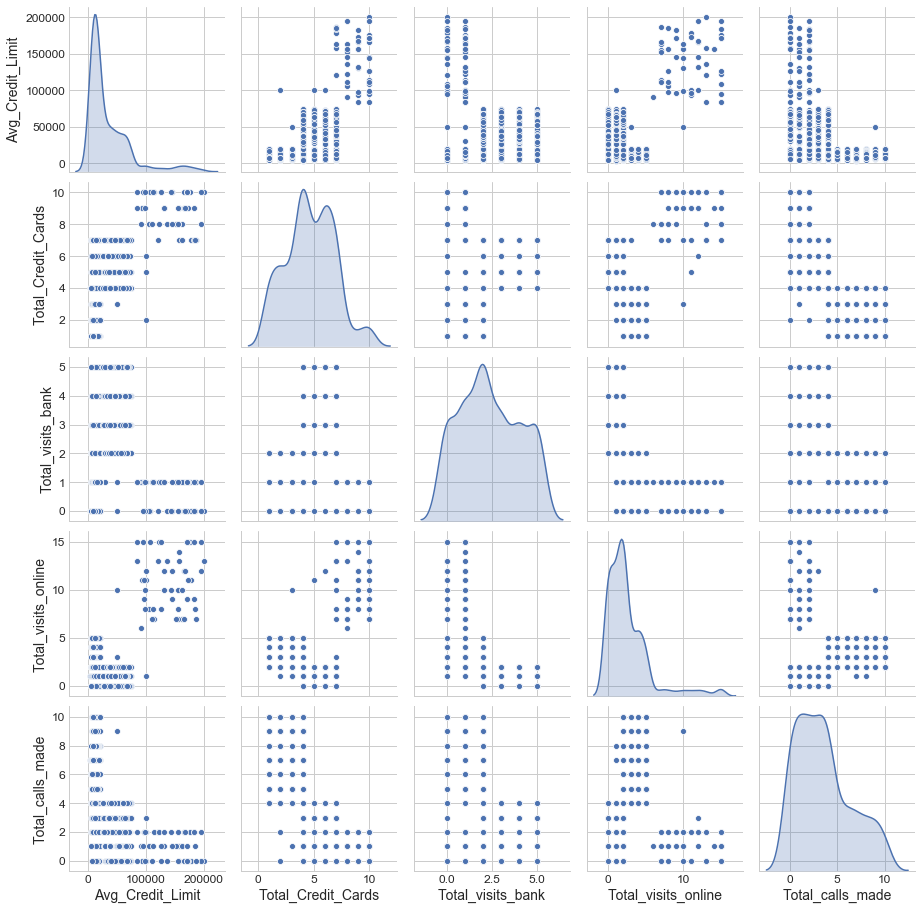

In [229]:
sns.pairplot(df02, diag_kind='kde') 

#Based on the kde plots, we can work with 2 or 3 clusters

In [230]:
#Scale the data
df02_z = df02.apply(zscore)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0.5, 0, 'k')

Text(0, 0.5, 'Average distortion')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

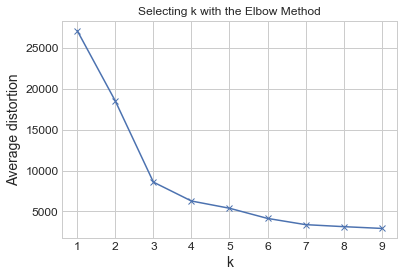

In [231]:
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df02)
    prediction=model.predict(df02)
    meanDistortions.append(sum(np.min(cdist(df02, model.cluster_centers_, 'euclidean'), axis=1)) / df02.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [232]:
#Set the value of k=3
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2345)

In [233]:
kmeans.fit(df02_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

In [234]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.596, -1.06 , -0.902,  0.323,  1.148],
       [-0.021,  0.374,  0.666, -0.554, -0.553],
       [ 2.832,  1.862, -1.106,  2.827, -0.874]])

In [235]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df02_z) )

In [236]:
print(centroid_df)

   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0         -0.595796           -1.059623          -0.901518   
1         -0.021062            0.373690           0.666395   
2          2.831764            1.862226          -1.105763   

   Total_visits_online  Total_calls_made  
0             0.322997          1.148109  
1            -0.553672         -0.553005  
2             2.827319         -0.874330  


#Cluster 0 has the lowest values while cluster 2 has highest values

In [237]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [238]:
# Joining the label dataframe with the data frame.
df_labeled = df02_z.join(df_labels)

In [239]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(4177)  # the groupby creates a grouped dataframe that needs to be converted back to dataframe. 
df_analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,0
2,0.410293,1.058973,-0.860451,0.134290,0.145528,1
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2
...,...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537,2
656,1.314621,2.443892,-0.860451,3.543188,-0.553005,2
657,2.937092,1.520613,-0.860451,2.179629,-0.902271,2
658,3.655235,2.443892,-0.860451,4.224968,-1.251537,2


In [240]:
df_labeled['labels'].value_counts()  

1    386
0    224
2     50
Name: labels, dtype: int64

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=2345, tol=0.0001, verbose=0)

[]

[]

[]

Text(0.5, 0, 'Length')

Text(0.5, 0, 'Height')

Text(0.5, 0, 'Weight')

Text(0.5, 0.92, '3D plot of KMeans Clustering')

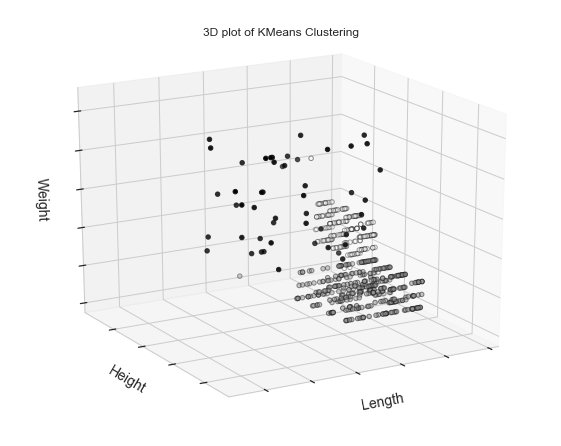

In [241]:
# 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(df02_z)
labels = kmeans.labels_
ax.scatter(df02_z.iloc[:, 0], df02_z.iloc[:, 1], df02_z.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [242]:
CustDataClust = df_analysis.groupby(['labels'])
CustDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DDAC54388>,
      dtype=object)

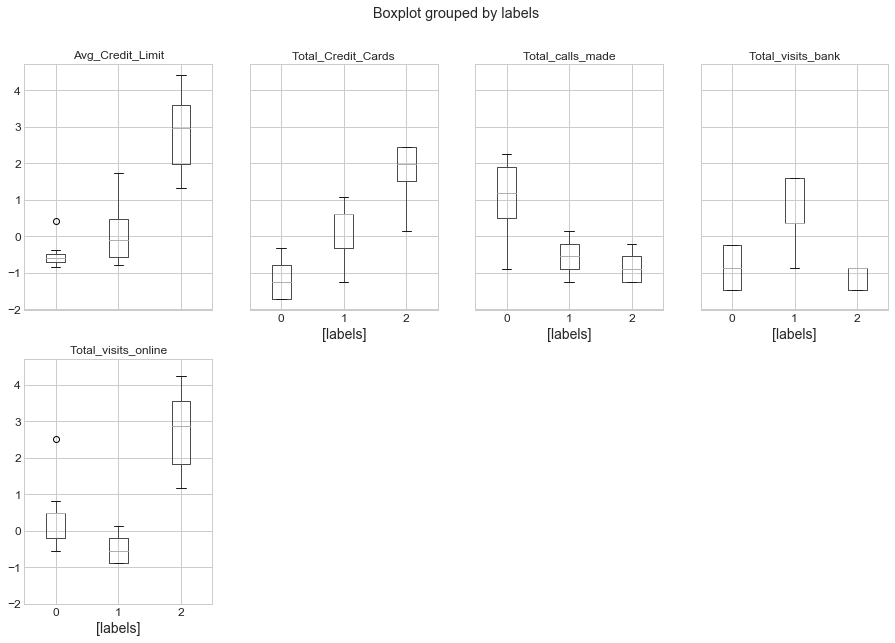

In [243]:
df_analysis.boxplot(by='labels', layout = (2,4),figsize=(15,10))

#Let us next try with K = 5, the next elbow point

In [245]:
final_model=KMeans(5)
final_model.fit(CustDataScaled)
prediction=final_model.predict(CustDataScaled)

#Append the prediction 
df02_z["GROUP"] = prediction
CustDataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
df02_z.head()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,2
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,2
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,2
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,0


In [246]:
custDataClust = df02_z.groupby(['GROUP'])
custDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,2.831764,1.862226,-1.105763,2.827319,-0.874330
1,-0.592426,-1.084085,-0.935241,0.347692,1.681731
2,0.044843,0.390067,0.056341,-0.563143,-0.531621
3,-0.599900,-1.029832,-0.860451,0.292922,0.498252
4,-0.089048,0.356795,1.295713,-0.543901,-0.575064


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027DE0676788>,
      dtype=object)

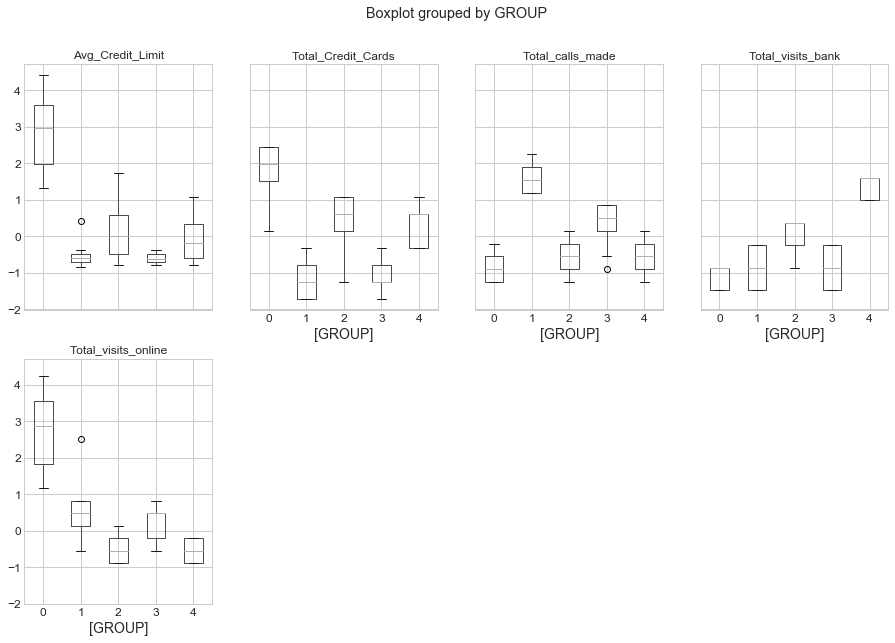

In [247]:
CustDataScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [248]:
#To determine if a relationship exists between two major variables. 
CustDataScaled['Avg_Credit_Limit'].corr(CustDataScaled['Total_Credit_Cards'])

0.608860493552496

In [249]:
#To determine if a relationship exists between two major variables. 
CustDataScaled['Avg_Credit_Limit'].corr(CustDataScaled['Total_visits_online'])

0.5513845236894895

In [250]:
#To determine if a relationship exists between two major variables. 
CustDataScaled['Total_Credit_Cards'].corr(CustDataScaled['Total_calls_made'])

-0.6512514976054079

In [251]:
#To determine if a relationship exists between two major variables. 
CustDataScaled['Total_visits_bank'].corr(CustDataScaled['Total_visits_online'])

-0.5518614016610992

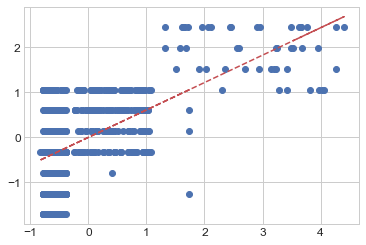

In [252]:
plt.plot(CustDataScaled['Avg_Credit_Limit'], CustDataScaled['Total_Credit_Cards'], 'bo')
z = np.polyfit(CustDataScaled['Avg_Credit_Limit'], CustDataScaled['Total_Credit_Cards'],1)
p = np.poly1d(z)
plt.plot(CustDataScaled['Avg_Credit_Limit'], p(CustDataScaled['Avg_Credit_Limit']), "r--")

#geom_point()

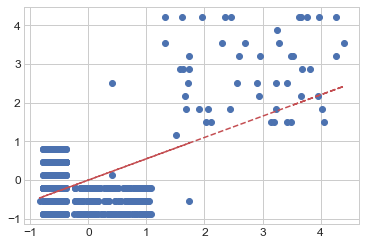

In [253]:
plt.plot(CustDataScaled['Avg_Credit_Limit'], CustDataScaled['Total_visits_online'], 'bo')
z = np.polyfit(CustDataScaled['Avg_Credit_Limit'], CustDataScaled['Total_visits_online'],1)
p = np.poly1d(z)
plt.plot(CustDataScaled['Avg_Credit_Limit'], p(CustDataScaled['Avg_Credit_Limit']), "r--")

#geom_point()

# Insights:03

#a) Higher the Average Credit Limit, higher is the number of Total Credit Cards.
#b) More the Average Credit Limit, more is the Total visits online.
#c) It is important to note, however, that correlation does not in any way indicate causality and is merely indicative of a relationship between the two.
#d) In K=3 clustering, Cluster 2 performs better while in K=5 clustering, Cluster/Group 0 performs better

# Silhouette Score 

In [254]:
print(silhouette_score(df01, kmeans.labels_))

0.10489576738178351


In [255]:
print(silhouette_score(df02, kmeans.labels_))

0.19407247682829207


In [256]:
print(silhouette_score(df02_z, kmeans.labels_))

0.4465610300881769


In [257]:
print(silhouette_score(CustDataScaled, kmeans.labels_))

0.4465610300881769


In [ ]:
KMeans = CustDataScaled

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x0000029C4779FF08>,
                 k=None, locate_elbow=True, metric='silhouette', model=None,
                 timings=False)

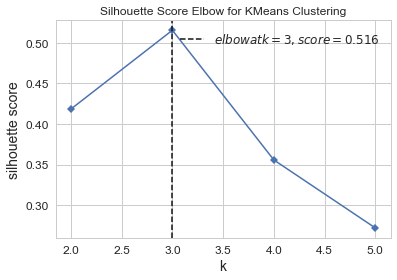

In [54]:
# Import the KElbowVisualizer method 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=0)

# Instantiate the KElbowVisualizer with the number of clusters and the metric 
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(CustDataScaled)    
visualizer.poof()   

# Insights:04

In [55]:
#a) Silhouette score of 0.45 indicates better performance of the scaled data.
#b) K-Means at K=3 performs better, since the Silhouette Score = 0.52. 
#b) However, score being quite far from unity renders K-Means not much effective.

# Final Insights:05 

In [260]:
#a) As it can be seen that Hierarchical Clustering is performing better than K-Means clustering, we can go ahead with our insights related to the former
#b) There almost nil correlation of bank contact (via visit, online or calls) with the other two variables viz. Average Credit Limit and Total Credit Cards
#c) The major clusters can be identified as the following:
    #i) HNI customers having high credit limit (>20000 or >80000)
    #ii) HNI customers having more number of credit cards (>5)
    #iii) Loyal customers who have contacted the bank multiple times (>2 or >5)
    #iv) Customers who have never contacted the bank
#d) The bank can run marketing campaigns for upselling to groups i & ii as above
#e) The bank can improve their support services for the groups iii & iv as above 

#NOTE: The data is highly inadequate to gather solid insights 